# Hypothesis Testing Multiple Regression Analysis

## The Movie Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv("movies_metadata.csv", low_memory= False)

In [3]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [6]:
movie.sort_index(inplace = True)
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,[],0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
NaT,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,[],0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
NaT,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,[],0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0


In [7]:
# Remove rows with NaT in the index
movie = movie[~movie.index.isna()]
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mobile Homes,False,0.0,1.0
2018-04-25,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.0,1.0
2018-11-07,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.0,12.0


In [8]:
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "runtime", "vote_average", "popularity"]].copy()

In [9]:
df

,title,budget,revenue,runtime,vote_average,popularity
release_date,,,,,,
2010-01-01,Ca$h,7000000,46488.0,108.0,6.0,9.107829
2010-01-01,Tokio Baby,0,0.0,0.0,2.0,0.041176
2010-01-01,Radio Free Albemuth,3600000,0.0,110.0,5.3,1.91768
2010-01-01,The Beast,0,0.0,77.0,8.0,0.049089
2010-01-01,Brutal Relax,0,0.0,15.0,6.6,0.941319
...,...,...,...,...,...,...
2016-12-29,To Walk Invisible,0,0.0,120.0,7.8,3.792964
2016-12-29,The Snow Queen 3: Fire and Ice,0,0.0,80.0,8.5,1.394369
2016-12-29,Viking,13000000,0.0,133.0,5.1,3.880153


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12262 entries, 2010-01-01 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         12262 non-null  object 
 1   budget        12262 non-null  object 
 2   revenue       12262 non-null  float64
 3   runtime       12178 non-null  float64
 4   vote_average  12262 non-null  float64
 5   popularity    12262 non-null  object 
dtypes: float64(3), object(3)
memory usage: 670.6+ KB


In [11]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

In [12]:
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [13]:
df = df[(df.revenue > 0) & (df.budget > 0)]

In [14]:
df

,title,budget,revenue,runtime,vote_average,popularity
release_date,,,,,,
2010-01-01,Ca$h,7000000,46488.0,108.0,6.0,9.107829
2010-01-08,Leap Year,19000000,29922472.0,100.0,6.5,7.432311
2010-01-12,Morning Glory,40000000,58785180.0,102.0,6.1,10.771255
2010-01-13,Devil,10000000,33583175.0,80.0,5.8,7.094276
2010-01-14,Tooth Fairy,48000000,112462508.0,101.0,5.2,6.744680
...,...,...,...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40000000,312242626.0,107.0,5.9,0.755710
2016-12-23,Railroad Tigers,50000000,102205175.0,124.0,6.2,3.798504
2016-12-23,Dangal,10400000,310000000.0,161.0,8.0,8.792104


In [15]:
df.set_index("title", inplace = True)

In [38]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.000001,0.000001,-39.675047,114.0,5.6,2.240259
1,All at Once,0.750000,0.000003,-15.887888,0.0,6.0,0.201582
2,Duniyadari,0.390000,0.000003,-219.030963,148.0,0.0,0.016219
3,Raja Natwarlal,0.000005,0.000004,-48.245394,141.0,5.5,1.109545
4,Bodyguard,0.000130,0.000008,-53.505265,130.0,5.2,2.402032
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.000000,1405.403694,944.969940,141.0,7.3,37.379420
1565,Furious 7,190.000000,1506.249360,647.161668,137.0,7.3,27.275687
1566,Jurassic World,150.000000,1513.528810,512.153481,124.0,6.5,32.790475
1567,The Avengers,220.000000,1519.557910,870.946647,143.0,7.4,89.887648


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1569 entries, Ca$h to 20th Century Women
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1569 non-null   int64  
 1   revenue       1569 non-null   float64
 2   runtime       1569 non-null   float64
 3   vote_average  1569 non-null   float64
 4   popularity    1569 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 73.5+ KB


In [17]:
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000

/var/folders/ff/3dmfg2n559z0x91_356v8vkm0000gn/T/ipykernel_31718/465903934.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  7.   19.   40.  ...  10.4 108.    7. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000


In [18]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0,0.046488,108.0,6.0,9.107829
Leap Year,19.0,29.922472,100.0,6.5,7.432311
Morning Glory,40.0,58.785180,102.0,6.1,10.771255
Devil,10.0,33.583175,80.0,5.8,7.094276
Tooth Fairy,48.0,112.462508,101.0,5.2,6.744680
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,107.0,5.9,0.755710
Railroad Tigers,50.0,102.205175,124.0,6.2,3.798504
Dangal,10.4,310.000000,161.0,8.0,8.792104


In [19]:
df.describe()

,budget,revenue,runtime,vote_average,popularity
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,37.890643,115.641690,110.029955,6.246399,11.069328
std,50.097848,208.966838,21.703204,0.857069,18.488345
min,0.000001,0.000001,0.000000,0.000000,0.016219
25%,6.200000,5.728213,96.000000,5.700000,6.091224
50%,18.700000,35.692920,107.000000,6.300000,8.896679
75%,45.000000,122.513057,120.000000,6.800000,12.572718
max,380.000000,2068.223624,338.000000,9.000000,547.488298


In [20]:
df.corr()

,budget,revenue,runtime,vote_average,popularity
budget,1.000000,0.796011,0.193094,0.075387,0.273034
revenue,0.796011,1.000000,0.178578,0.201292,0.399787
runtime,0.193094,0.178578,1.000000,0.323491,0.040103
vote_average,0.075387,0.201292,0.323491,1.000000,0.129288
popularity,0.273034,0.399787,0.040103,0.129288,1.000000


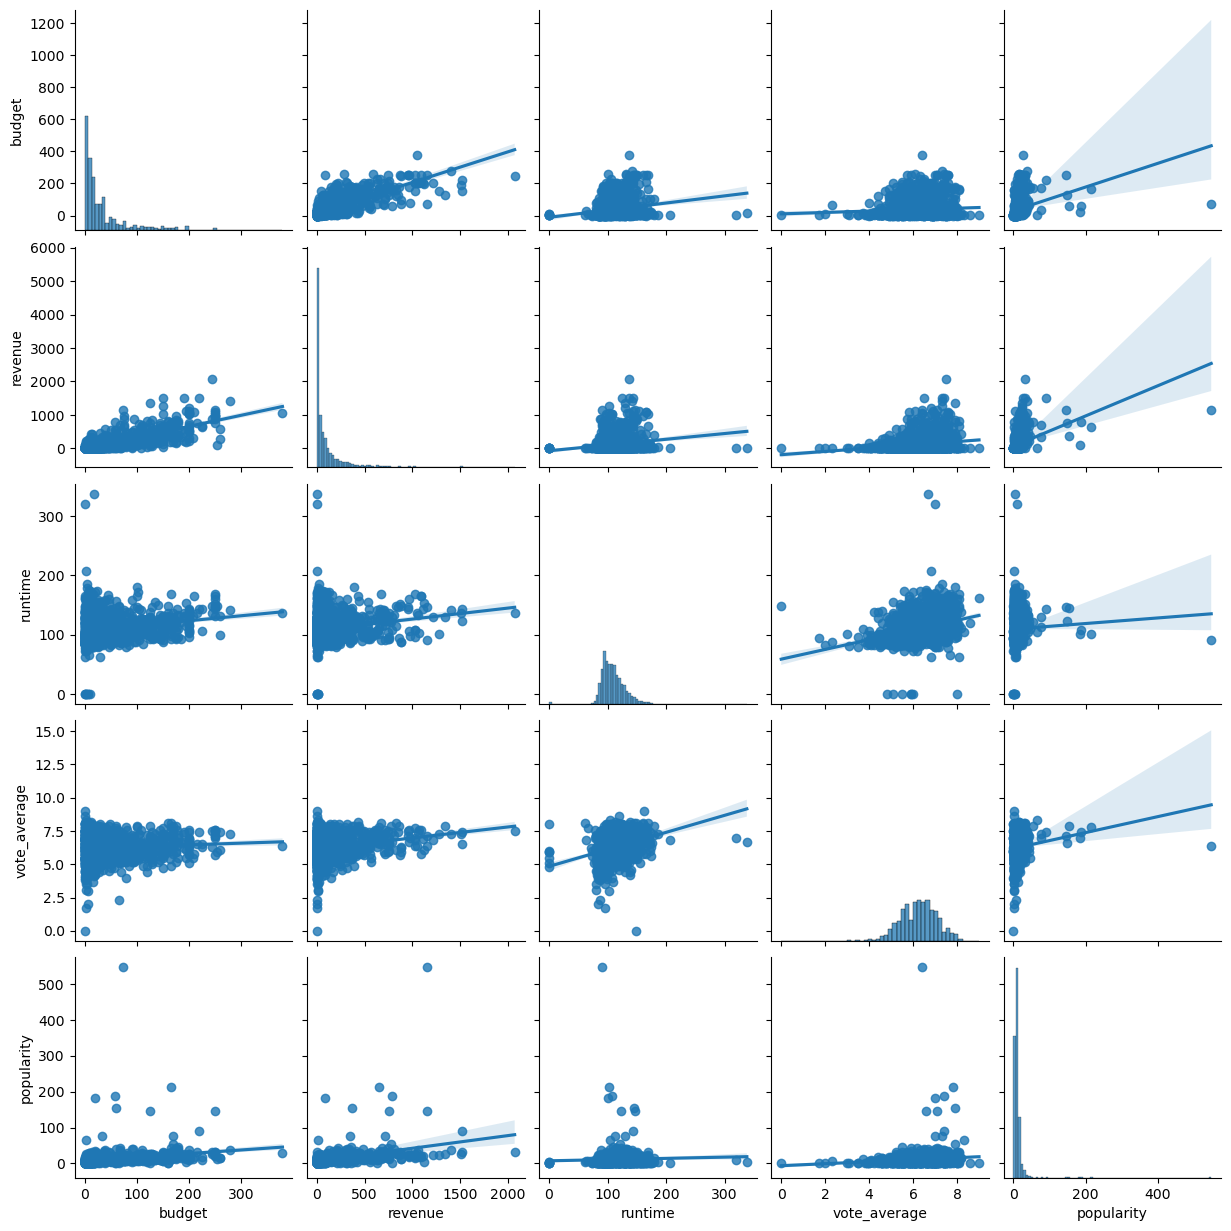

In [21]:
sns.pairplot(df, kind = "reg")
plt.show()

## Multiple Regression Analysis with statsmodels

In [22]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0,0.046488,108.0,6.0,9.107829
Leap Year,19.0,29.922472,100.0,6.5,7.432311
Morning Glory,40.0,58.785180,102.0,6.1,10.771255
Devil,10.0,33.583175,80.0,5.8,7.094276
Tooth Fairy,48.0,112.462508,101.0,5.2,6.744680
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,107.0,5.9,0.755710
Railroad Tigers,50.0,102.205175,124.0,6.2,3.798504
Dangal,10.4,310.000000,161.0,8.0,8.792104


In [ ]:
# downlad df to csv
df.to_csv("Movies_2010_2016MultiRegressionDataSet.csv", index = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1569 entries, Ca$h to 20th Century Women
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1569 non-null   float64
 1   revenue       1569 non-null   float64
 2   runtime       1569 non-null   float64
 3   vote_average  1569 non-null   float64
 4   popularity    1569 non-null   float64
dtypes: float64(5)
memory usage: 105.8+ KB


In [24]:
from statsmodels.formula.api import ols

In [25]:
model = ols("revenue ~ budget + runtime + vote_average + popularity", data = df)

In [26]:
results = model.fit()

In [27]:
results.params

Intercept      -202.885651
budget            3.083032
runtime          -0.117440
vote_average     30.711734
popularity        2.059151
dtype: float64

In [28]:
results.predict()

array([  9.03687126,  58.87850165, 117.97799931, ...,  74.06821345,
       346.41242563,  49.2107336 ], shape=(1569,))

In [ ]:
# Add predicted values to the dataframe - actual vs predicted revenue based on the multi regression model
df.insert(loc = 2, column = "predict", value = results.predict())

In [30]:
df

,budget,revenue,predict,runtime,vote_average,popularity
title,,,,,,
Ca$h,7.0,0.046488,9.036871,108.0,6.0,9.107829
Leap Year,19.0,29.922472,58.878502,100.0,6.5,7.432311
Morning Glory,40.0,58.785180,117.977999,102.0,6.1,10.771255
Devil,10.0,33.583175,11.285727,80.0,5.8,7.094276
Tooth Fairy,48.0,112.462508,106.827813,101.0,5.2,6.744680
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,90.624936,107.0,5.9,0.755710
Railroad Tigers,50.0,102.205175,134.937875,124.0,6.2,3.798504
Dangal,10.4,310.000000,74.068213,161.0,8.0,8.792104


In [ ]:
# Calculate residuals of the revenue predictions
df.revenue - df.predict

title
Ca$h                                 -8.990383
Leap Year                           -28.956030
Morning Glory                       -59.192819
Devil                                22.297448
Tooth Fairy                           5.634695
                                       ...    
Resident Evil: The Final Chapter    221.617690
Railroad Tigers                     -32.732700
Dangal                              235.931787
Live by Night                      -323.733871
20th Century Women                  -43.394523
Length: 1569, dtype: float64

In [32]:
results.resid

title
Ca$h                                 -8.990383
Leap Year                           -28.956030
Morning Glory                       -59.192819
Devil                                22.297448
Tooth Fairy                           5.634695
                                       ...    
Resident Evil: The Final Chapter    221.617690
Railroad Tigers                     -32.732700
Dangal                              235.931787
Live by Night                      -323.733871
20th Century Women                  -43.394523
Length: 1569, dtype: float64

In [33]:
df = df.sort_values("revenue").reset_index()

In [34]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.000001,0.000001,-39.675047,114.0,5.6,2.240259
1,All at Once,0.750000,0.000003,-15.887888,0.0,6.0,0.201582
2,Duniyadari,0.390000,0.000003,-219.030963,148.0,0.0,0.016219
3,Raja Natwarlal,0.000005,0.000004,-48.245394,141.0,5.5,1.109545
4,Bodyguard,0.000130,0.000008,-53.505265,130.0,5.2,2.402032
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.000000,1405.403694,944.969940,141.0,7.3,37.379420
1565,Furious 7,190.000000,1506.249360,647.161668,137.0,7.3,27.275687
1566,Jurassic World,150.000000,1513.528810,512.153481,124.0,6.5,32.790475
1567,The Avengers,220.000000,1519.557910,870.946647,143.0,7.4,89.887648


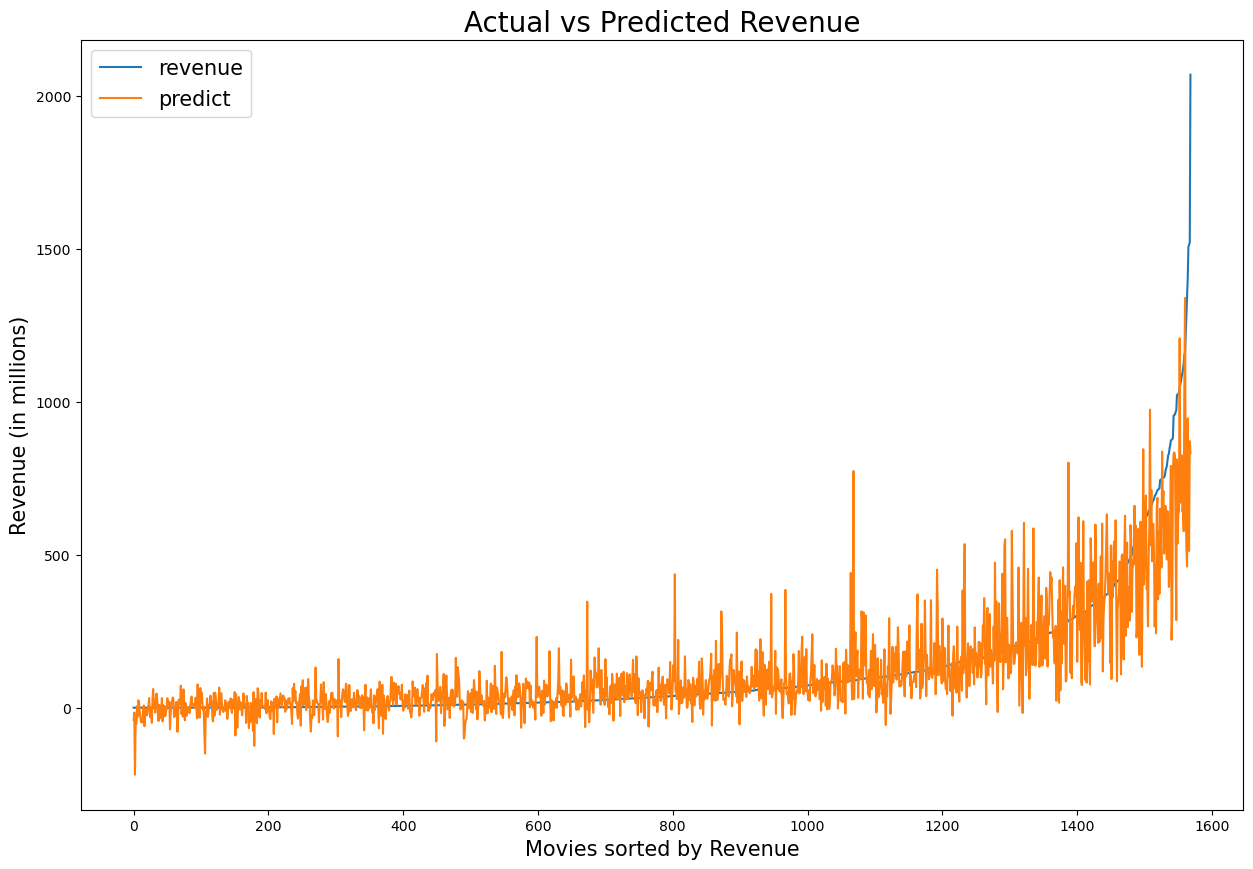

In [36]:
df.loc[:, ["revenue", "predict"]].plot(figsize = (15, 10))
plt.xlabel("Movies sorted by Revenue", fontsize = 15)
plt.ylabel("Revenue (in millions)", fontsize = 15)
plt.title("Actual vs Predicted Revenue", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [39]:
results.ssr

np.float64(21611479.34815669)

In [40]:
results.mse_resid

np.float64(13818.081424652615)

In [41]:
results.mse_resid**0.5

np.float64(117.5503357062523)

on average, the true revenue is + or - $117.55M away from the predicted values

## Coefficient of Determination: the Adjusted R squared (for Mult Regression)
For evaluating the fit of the model

In [42]:
results.rsquared

np.float64(0.6843660611789255)

In [43]:
results.rsquared_adj

np.float64(0.683558813253552)

### Regression Coefficients, Hypothesis Testing & Model Specification - T-test

In [44]:
pd.options.display.float_format = '{:.4f}'.format

In [45]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


In [46]:
results.params

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

In [47]:
results.tvalues

Intercept      -8.6450
budget         49.1353
runtime        -0.7983
vote_average    8.3246
popularity     12.2409
dtype: float64

In [48]:
results.pvalues

Intercept      0.0000
budget         0.0000
runtime        0.4248
vote_average   0.0000
popularity     0.0000
dtype: float64

p-values shows that runtime is not significant

In [49]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     847.8
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:18:06   Log-Likelihood:                -9703.0
No. Observations:                1569   AIC:                         1.942e+04
Df Residuals:                    1564   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -202.8857     23.469     -8.645   

budget coef 3.0830 - Holding all the other variables constant, increase of the budger by $1m, then the expected revenue increase is $3.08m <br>
voting_average (scale between 0 and 10) 30.7117 - Holding all the other variables constant, increasing the average rating by 1, then the expected revenue increase is $30.7m<br>
popularity 2.0592 - Holding all the other variables constant, increasing the popularity score by 1, then the expected revenue increase is $2.06m<br>

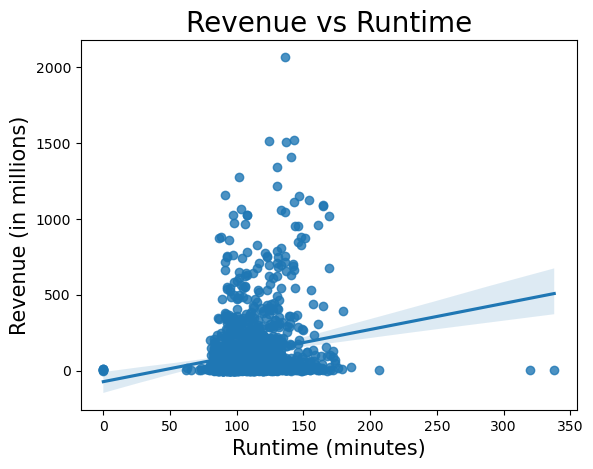

In [52]:
sns.regplot(x = "runtime", y = "revenue", data = df)
plt.xlabel("Runtime (minutes)", fontsize = 15)
plt.ylabel("Revenue (in millions)", fontsize = 15)
plt.title("Revenue vs Runtime", fontsize = 20)
plt.show()

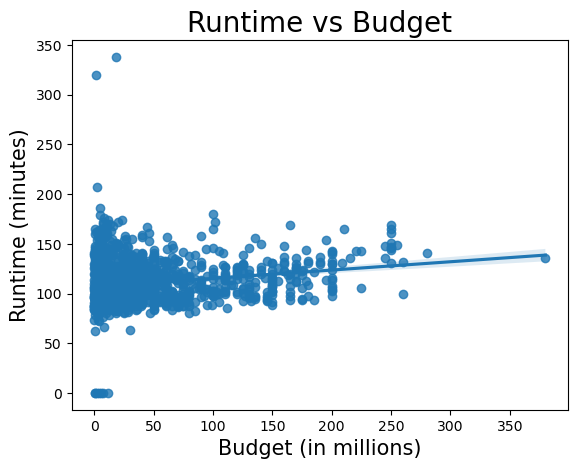

In [53]:
sns.regplot(x = "budget", y = "runtime", data = df)
plt.xlabel("Budget (in millions)", fontsize = 15)
plt.ylabel("Runtime (minutes)", fontsize = 15)
plt.title("Runtime vs Budget", fontsize = 20)
plt.show()

#### Testing the Variables

In [57]:
model = ols("revenue ~  runtime", data = df)

In [58]:
results = model.fit()

In [59]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     51.62
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.04e-12
Time:                        10:30:25   Log-Likelihood:                -10582.
No. Observations:                1569   AIC:                         2.117e+04
Df Residuals:                    1567   BIC:                         2.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.5457     26.840     -2.740      0.0

In [ ]:
model = ols("revenue ~  runtime + budget", data = df) # budget becomes more significant than runtime
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1358.
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:32:26   Log-Likelihood:                -9818.6
No. Observations:                1569   AIC:                         1.964e+04
Df Residuals:                    1566   BIC:                         1.966e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.7493     16.518     -2.225      0.0

In [61]:
model = ols("revenue ~  runtime + budget + vote_average", data = df) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     986.6
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:33:47   Log-Likelihood:                -9774.8
No. Observations:                1569   AIC:                         1.956e+04
Df Residuals:                    1565   BIC:                         1.958e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -212.5951     24.545     -8.661   

In [62]:
model = ols("revenue ~  runtime + budget + vote_average + popularity", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     847.8
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:34:32   Log-Likelihood:                -9703.0
No. Observations:                1569   AIC:                         1.942e+04
Df Residuals:                    1564   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -202.8857     23.469     -8.645   

#### Remove runtime since it is not significant

In [63]:
# remove runtime from the model since it is not significant
model = ols("revenue ~  budget + vote_average + popularity", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:36:49   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

Shows that runtime does not contribute to the model

## Hypothesis Test - The F-Test (one-sided test)
Test the set of independent variables<br>
Ho: all slope coefficients = 0<br>
Ha: at least one slope coefficients is not = 0<br>

In [64]:
results.fvalue

np.float64(1130.4187152050447)

In [65]:
results.f_pvalue

np.float64(0.0)

In [66]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:46:36   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

# Creating and working with Dummy Variables (Part 1)
Converting categorical variables to Dummy Variables

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
movie = pd.read_csv("movies_metadata.csv", low_memory= False)

In [69]:
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [70]:
movie.sort_index(inplace = True)

In [71]:
# Remove rows with NaT in the index
movie = movie[~movie.index.isna()]
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0000,19.0000
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2000,25.0000
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4000,7.0000
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1000,17.0000
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4000,18.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",0.0000,105.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mobile Homes,False,0.0000,1.0000
2018-04-25,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",0.0000,0.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.0000,1.0000
2018-11-07,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,0.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.0000,12.0000


In [ ]:
movie

In [72]:
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "vote_average", "popularity",
                              "belongs_to_collection", "original_language"]].copy()

In [73]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

In [74]:
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [75]:
df = df[(df.revenue > 0) & (df.budget > 0)]

In [76]:
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000

/var/folders/ff/3dmfg2n559z0x91_356v8vkm0000gn/T/ipykernel_31718/465903934.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  7.   19.   40.  ...  10.4 108.    7. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000


In [77]:
df.sort_values("revenue", ascending = False)

,title,budget,revenue,vote_average,popularity,belongs_to_collection,original_language
release_date,,,,,,,
2015-12-15,Star Wars: The Force Awakens,245.0000,2068.2236,7.5000,31.6260,"{'id': 10, 'name': 'Star Wars Collection', 'po...",en
2012-04-25,The Avengers,220.0000,1519.5579,7.4000,89.8876,"{'id': 86311, 'name': 'The Avengers Collection...",en
2015-06-09,Jurassic World,150.0000,1513.5288,6.5000,32.7905,"{'id': 328, 'name': 'Jurassic Park Collection'...",en
2015-04-01,Furious 7,190.0000,1506.2494,7.3000,27.2757,"{'id': 9485, 'name': 'The Fast and the Furious...",en
2015-04-22,Avengers: Age of Ultron,280.0000,1405.4037,7.3000,37.3794,"{'id': 86311, 'name': 'The Avengers Collection...",en
...,...,...,...,...,...,...,...
2011-08-31,Bodyguard,0.0001,0.0000,5.2000,2.4020,NaN,hi
2014-08-29,Raja Natwarlal,0.0000,0.0000,5.5000,1.1095,NaN,hi
2014-06-05,All at Once,0.7500,0.0000,6.0000,0.2016,NaN,ru


#### Convert collections to True or False

In [78]:
df.belongs_to_collection.notnull()

release_date
2010-01-01    False
2010-01-08    False
2010-01-12    False
2010-01-13    False
2010-01-14     True
              ...  
2016-12-23     True
2016-12-23    False
2016-12-23    False
2016-12-25    False
2016-12-25    False
Name: belongs_to_collection, Length: 1569, dtype: bool

In [79]:
df.belongs_to_collection = df.belongs_to_collection.notnull()

In [80]:
df.set_index("title", inplace = True)

In [81]:
df

,budget,revenue,vote_average,popularity,belongs_to_collection,original_language
title,,,,,,
Ca$h,7.0000,0.0465,6.0000,9.1078,False,en
Leap Year,19.0000,29.9225,6.5000,7.4323,False,en
Morning Glory,40.0000,58.7852,6.1000,10.7713,False,en
Devil,10.0000,33.5832,5.8000,7.0943,False,en
Tooth Fairy,48.0000,112.4625,5.2000,6.7447,True,en
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,5.9000,0.7557,True,en
Railroad Tigers,50.0000,102.2052,6.2000,3.7985,False,zh
Dangal,10.4000,310.0000,8.0000,8.7921,False,hi


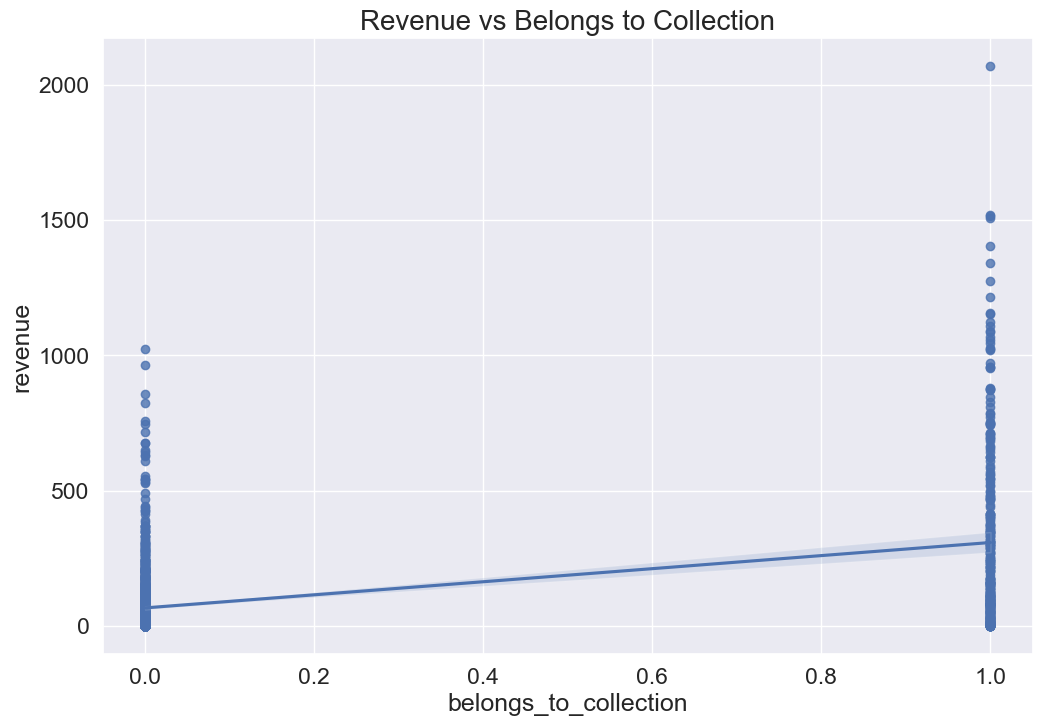

In [84]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
plt.title("Revenue vs Belongs to Collection", fontsize = 20)
sns.regplot(x = "belongs_to_collection", y = "revenue", data = df)
plt.show()

In [85]:
from statsmodels.formula.api import ols

In [87]:
model = ols("revenue ~ budget + popularity + vote_average", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:57:30   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

In [88]:
model = ols("revenue ~ budget + popularity + vote_average + belongs_to_collection", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     980.8
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:58:03   Log-Likelihood:                -9623.0
No. Observations:                1569   AIC:                         1.926e+04
Df Residuals:                    1564   BIC:                         1.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

If a movie belongs to a collection, expect almost $100M higher revenue. Therefore, the dummy variable for collection is highly significant

### Creating and working with Dummy Variables (Part 2)
Adding dummy variables for movie language True/False for English

In [89]:
df

,budget,revenue,vote_average,popularity,belongs_to_collection,original_language
title,,,,,,
Ca$h,7.0000,0.0465,6.0000,9.1078,False,en
Leap Year,19.0000,29.9225,6.5000,7.4323,False,en
Morning Glory,40.0000,58.7852,6.1000,10.7713,False,en
Devil,10.0000,33.5832,5.8000,7.0943,False,en
Tooth Fairy,48.0000,112.4625,5.2000,6.7447,True,en
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,5.9000,0.7557,True,en
Railroad Tigers,50.0000,102.2052,6.2000,3.7985,False,zh
Dangal,10.4000,310.0000,8.0000,8.7921,False,hi


In [90]:
df.original_language.nunique()

34

In [ ]:
# dummy code for original_language
df.original_language.value_counts()

original_language
en    1290
hi      57
fr      42
ru      32
ta      17
zh      16
ko      15
es      14
it      13
ml      10
ja       9
de       7
da       6
cn       5
te       4
id       3
nl       3
he       3
no       3
ur       2
pl       2
hu       2
ro       2
pt       2
sr       1
ca       1
sv       1
nb       1
fi       1
is       1
kn       1
xx       1
tr       1
mr       1
Name: count, dtype: int64

In [ ]:
# create dummy variables for original_language
df_dumm = pd.get_dummies(df, columns = ["original_language"])

In [93]:
df_dumm

,budget,revenue,vote_average,popularity,belongs_to_collection,original_language_ca,original_language_cn,original_language_da,original_language_de,original_language_en,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_xx,original_language_zh
title,,,,,,,,,,,,,,,,,,,,,
Ca$h,7.0000,0.0465,6.0000,9.1078,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Leap Year,19.0000,29.9225,6.5000,7.4323,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Morning Glory,40.0000,58.7852,6.1000,10.7713,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Devil,10.0000,33.5832,5.8000,7.0943,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Tooth Fairy,48.0000,112.4625,5.2000,6.7447,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,5.9000,0.7557,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Railroad Tigers,50.0000,102.2052,6.2000,3.7985,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
Dangal,10.4000,310.0000,8.0000,8.7921,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
df_dumm.columns.str.contains("language")

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [95]:
df_dumm.columns.str.contains("language").sum()

np.int64(34)

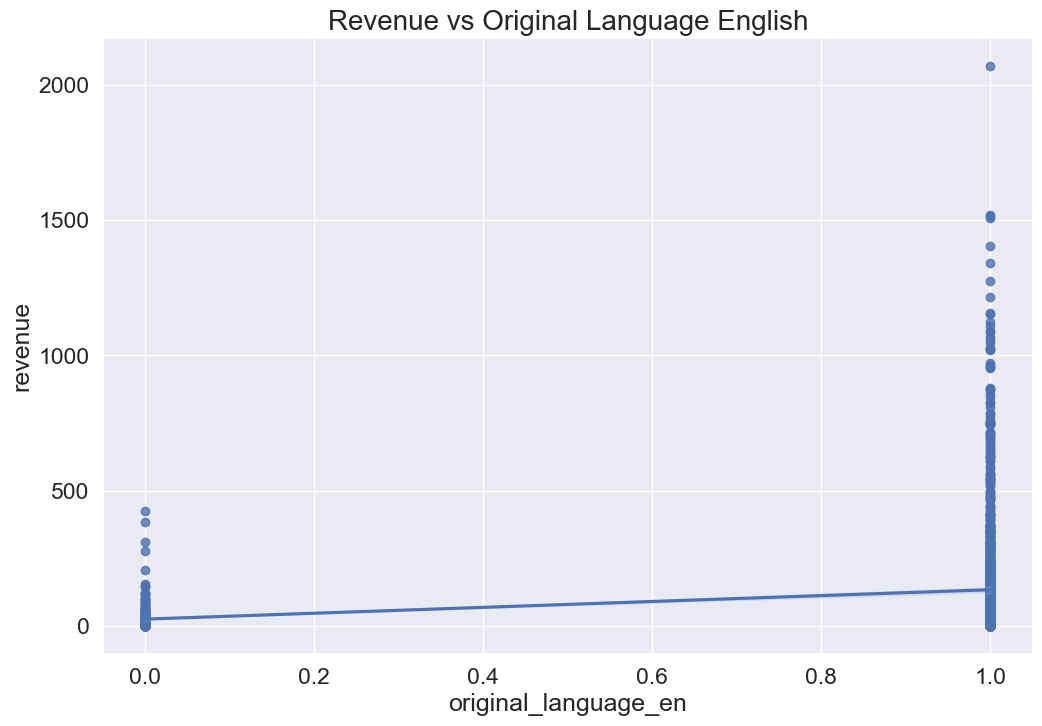

In [ ]:
# dummy variable for original_language_en
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
plt.title("Revenue vs Original Language English", fontsize = 20)
sns.regplot(x = "original_language_en", y = "revenue", data = df_dumm)
plt.show()

In [98]:
model = ols("revenue ~ original_language_en", data = df_dumm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     64.45
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.92e-15
Time:                        12:05:47   Log-Likelihood:                -10576.
No. Observations:                1569   AIC:                         2.116e+04
Df Residuals:                    1567   BIC:                         2.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [101]:
model = ols("revenue ~ budget + popularity + vote_average + belongs_to_collection + original_language_en", data = df_dumm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     784.1
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        12:09:43   Log-Likelihood:                -9623.0
No. Observations:                1569   AIC:                         1.926e+04
Df Residuals:                    1563   BIC:                         1.929e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Does not look like orginal language English does not contribute any marginal benifit even when it's significant on a stand alone basis<br>
English moves are also correlated with other variables (i.e. English moveis have higher budgets and are more popular, and all well known clooections are english productions)<br>

In [102]:
# remove english from the model
model = ols("revenue ~ budget + popularity + vote_average + belongs_to_collection", data = df_dumm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     980.8
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        12:14:19   Log-Likelihood:                -9623.0
No. Observations:                1569   AIC:                         1.926e+04
Df Residuals:                    1564   BIC:                         1.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     